In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Assuming data is in a csv file
data = pd.read_csv("balenced_torch_data.csv")

# Convert API names and parameters to string if not already
data["API Name"] = data["API Name"].astype(str)
data["Parameters"] = data["Parameters"].astype(str)

# Initialize TF-IDF vectorizer and Label Encoder
tfidf = TfidfVectorizer(max_features=1000)
le = LabelEncoder()

# Encode API names
api_names_encoded = le.fit_transform(data["API Name"])
api_names_encoded = np.array(api_names_encoded).reshape(-1, 1) # reshaping to make it a 2D array

# Convert parameters into TF-IDF vectors
parameters_tfidf = tfidf.fit_transform(data["Parameters"])

# Combine the encoded API names and TF-IDF parameter vectors
X = np.concatenate((api_names_encoded, parameters_tfidf.toarray()), axis=1)

# Convert labels into binary format
y = data["Label"].map({'bug': 1, 'success': 0})

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [2]:
print(X_train_smote)

[[204.          0.          0.        ...   0.          0.
    0.       ]
 [242.          0.          0.        ...   0.          0.
    0.       ]
 [296.          0.          0.        ...   0.          0.
    0.       ]
 ...
 [300.          0.          0.        ...   0.          0.
    0.       ]
 [352.          0.          0.        ...   0.5144719   0.
    0.       ]
 [ 58.          0.          0.        ...   0.          0.
    0.       ]]


In [3]:
import tensorflow as tf

# Model Architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_dim=X_train_smote.shape[1]),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the Model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the Model
history = model.fit(X_train_smote, y_train_smote, epochs=10, batch_size=32, validation_data=(X_test, y_test))

2023-06-28 17:20:40.856753: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-28 17:20:40.877576: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-28 17:20:41.221386: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Epoch 1/10


2023-06-28 17:20:41.585950: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-28 17:20:41.617319: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-28 17:20:41.617435: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

75/75 [==============================] - 2s 2ms/step - loss: 2.9863 - accuracy: 0.5059 - val_loss: 0.7101 - val_accuracy: 0.4822
Epoch 2/10
75/75 [==============================] - 0s 2ms/step - loss: 1.0496 - accuracy: 0.5096 - val_loss: 0.6918 - val_accuracy: 0.4822
Epoch 3/10
75/75 [==============================] - 0s 1ms/step - loss: 0.7712 - accuracy: 0.5310 - val_loss: 0.6840 - val_accuracy: 0.6565
Epoch 4/10
75/75 [==============================] - 0s 1ms/step - loss: 0.7179 - accuracy: 0.5545 - val_loss: 0.6840 - val_accuracy: 0.6768
Epoch 5/10
75/75 [==============================] - 0s 1ms/step - loss: 0.7037 - accuracy: 0.5554 - val_loss: 0.6803 - val_accuracy: 0.6667
Epoch 6/10
75/75 [==============================] - 0s 1ms/step - loss: 0.6968 - accuracy: 0.5650 - val_loss: 0.6753 - val_accuracy: 0.6751
Epoch 7/10
75/75 [==============================] - 0s 1ms/step - loss: 0.6770 - accuracy: 0.5927 - val_loss: 0.6732 - val_accuracy: 0.6768
Epoch 8/10
75/75 [=============

In [8]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [6]:
import matplotlib.pyplot as plt

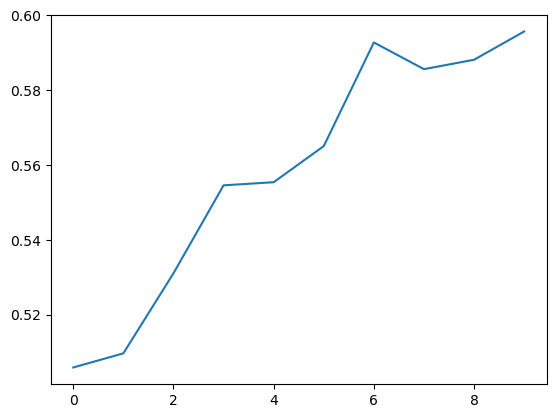

In [9]:
plt.plot(history.epoch,history.history.get('accuracy'))

In [4]:
# Read new data from a csv file
new_data = pd.read_csv("torch-testdata.csv")

# Ensure API names and parameters are strings
new_data["API Name"] = new_data["API Name"].astype(str)
new_data["Parameters"] = new_data["Parameters"].astype(str)

# Perform the same preprocessing steps as before
new_data_tfidf = tfidf.transform(new_data["Parameters"]).toarray()
new_api_names_encoded = le.transform(new_data["API Name"]).reshape(-1, 1)
X_new = np.concatenate((new_api_names_encoded, new_data_tfidf), axis=1)

# Predict the labels
predictions = model.predict(X_new)

# Convert the probabilities to class labels
predictions_labels = (predictions > 0.5).astype(int)

# Add the predictions to the new_data DataFrame
new_data["Predicted Label"] = predictions_labels

# Write the DataFrame with the predictions to a new csv file
new_data.to_csv("new_data_with_predictions.csv", index=False)


ValueError: y contains previously unseen labels: 'torch.nn.Threshold'